In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [9]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
X_train.shape


X_test.shape


single_image= X_train[0]

In [10]:
single_image.shape

(28, 28)

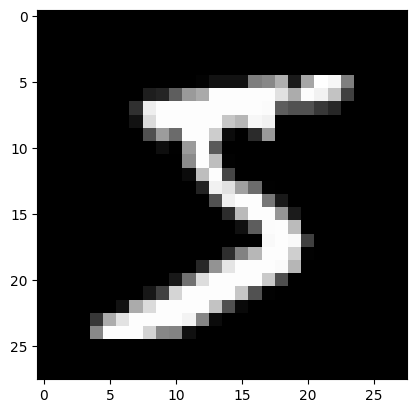

In [11]:
plt.imshow(single_image,cmap='gray')

In [14]:
y_train.shape
X_train.min()
X_train.max()

255

In [15]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0
X_train_scaled.min()
X_train_scaled.max()
y_train[0]

5

In [16]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)


In [17]:
type(y_train_onehot)
y_train_onehot.shape

(60000, 10)

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

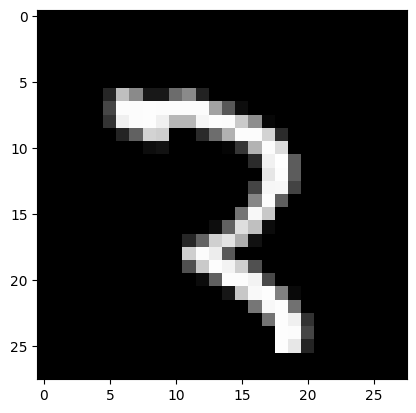

In [18]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')
y_train_onehot[500]

In [19]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [20]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(32))
model.add(layers.Dense(10,activation="softmax"))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 64)                346176    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                        

In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')


In [25]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))


Epoch 1/5
938/938 [==============================] - 42s 44ms/step - loss: 0.2052 - accuracy: 0.9392 - val_loss: 0.0750 - val_accuracy: 0.9757
Epoch 2/5
938/938 [==============================] - 29s 30ms/step - loss: 0.0642 - accuracy: 0.9808 - val_loss: 0.0539 - val_accuracy: 0.9821
Epoch 3/5
938/938 [==============================] - 27s 29ms/step - loss: 0.0428 - accuracy: 0.9870 - val_loss: 0.0484 - val_accuracy: 0.9846
Epoch 4/5
938/938 [==============================] - 29s 31ms/step - loss: 0.0311 - accuracy: 0.9904 - val_loss: 0.0559 - val_accuracy: 0.9824
Epoch 5/5
938/938 [==============================] - 39s 41ms/step - loss: 0.0246 - accuracy: 0.9921 - val_loss: 0.0507 - val_accuracy: 0.9828


In [26]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.205219,0.939217,0.075026,0.9757
1,0.064199,0.980800,0.053866,0.9821
2,0.042752,0.986983,0.048391,0.9846
3,0.031119,0.990400,0.055868,0.9824
4,0.024557,0.992067,0.050669,0.9828


<Axes: >

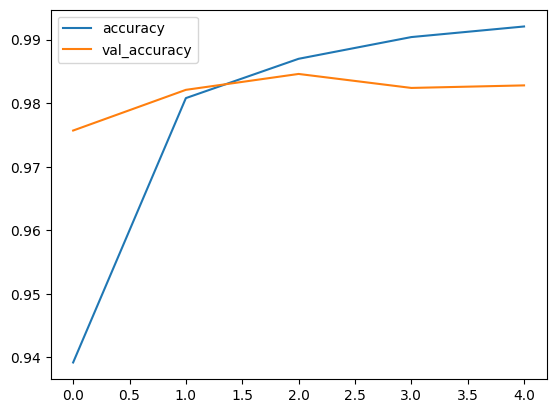

In [28]:
metrics[['accuracy','val_accuracy']].plot()

313/313 [==============================] - 2s 7ms/step


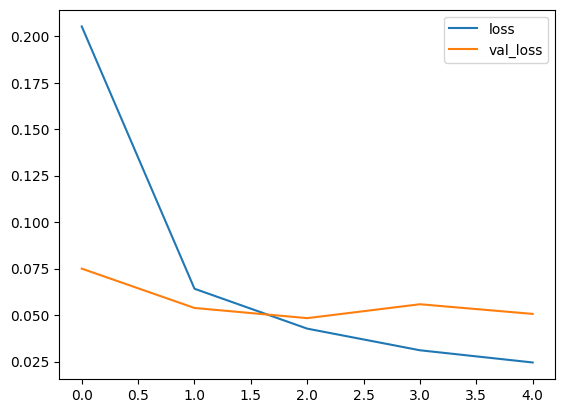

In [29]:
metrics[['loss','val_loss']].plot()
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

In [30]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 974    0    1    0    0    1    3    1    0    0]
 [   0 1127    2    1    0    1    1    1    2    0]
 [   3    1 1013    1    1    0    2    7    4    0]
 [   0    0    2  993    0    5    0    5    5    0]
 [   1    0    0    0  978    0    0    0    0    3]
 [   1    0    0    8    0  881    2    0    0    0]
 [   8    3    1    0    3    3  937    0    3    0]
 [   1    0    6    0    0    0    0 1020    1    0]
 [   6    0    5    0    1    2    0    2  957    1]
 [   2    3    0    4   10    7    0   21   14  948]]


In [31]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.98      1.00      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.96      0.99      0.98      1028
           8       0.97      0.98      0.98       974
           9       1.00      0.94      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [32]:
img = image.load_img('images.png')

In [33]:
type(img)

PIL.Image.Image

In [34]:
img = image.load_img('images.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [35]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 35ms/step


In [36]:
print(x_single_prediction)

[7]


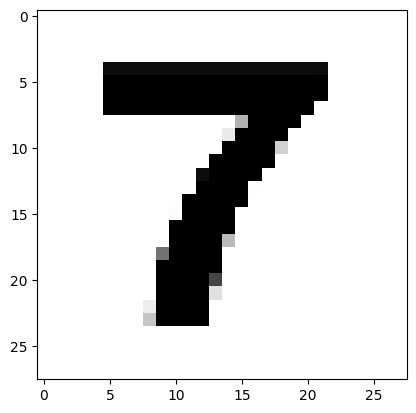

In [37]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')


In [38]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [39]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 74ms/step


In [40]:
print(x_single_prediction)

[3]
